In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV File

In [3]:
df = pd.read_csv('Supermarket_Sales_Visualizations.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Hours information
df['Hour']= df['Time'].str.split(':').str[0].astype(int)

#Date information
df['Day']=df['Date'].str.split('/').str[1].astype(int) #mmddyyyy format
df['MonthNum']=df['Date'].str.split('/').str[0].astype(int)
df['Year']=df['Date'].str.split('/').str[2].astype(int)

#Week information
df['Date']=pd.to_datetime(df['Date'])
df['DayOfWeek']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()

#df['gross income'].to_string
#to_numeric(df['goss income'])

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Hour,Day,MonthNum,Year,DayOfWeek,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,13,5,1,2019,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,10,8,3,2019,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,13,3,3,2019,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,20,27,1,2019,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,10,8,2,2019,Friday,February


In [131]:
df.shape

(1000, 23)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [132]:
df.isnull().sum() #data set has no null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Hour                       0
Day                        0
MonthNum                   0
Year                       0
DayOfWeek                  0
Month                      0
dtype: int64

In [5]:
df.drop(columns=['Invoice ID','Branch','Date'],inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   object 
 1   Customer type            1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   Product line             1000 non-null   object 
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Time                     1000 non-null   object 
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
 14  Hour                     

In [102]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Day,MonthNum,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,14.910000,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,3.186857,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,10.000000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,12.000000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,18.000000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,20.000000,31.000000,3.000000,2019.0


In [103]:
df.describe(include='all')

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day,MonthNum,Year,DayOfWeek,Month
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000,1000
unique,3,2,2,6,NaN,NaN,NaN,NaN,506,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3
top,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,19:48,Ewallet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,January
freq,340,501,501,178,NaN,NaN,NaN,NaN,7,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,352
mean,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270,14.910000,15.256000,1.993000,2019.0,NaN,NaN
std,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,3.186857,8.693563,0.835254,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000,10.000000,1.000000,1.000000,2019.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000,12.000000,8.000000,1.000000,2019.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000,15.000000,15.000000,2.000000,2019.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000,18.000000,23.000000,3.000000,2019.0,NaN,NaN


In [104]:
df.describe(include='object')

,City,Customer type,Gender,Product line,Time,Payment,DayOfWeek,Month
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,2,2,6,506,3,7,3
top,Yangon,Member,Female,Fashion accessories,19:48,Ewallet,Saturday,January
freq,340,501,501,178,7,345,164,352


In [6]:
df2=df.groupby(['Product line','City'])['gross income'].agg(['count','mean'])
df2

count       mean
Product line           City                       
Electronic accessories Mandalay      55  14.763155
                       Naypyitaw     55  16.423355
                       Yangon        60  14.537392
Fashion accessories    Mandalay      62  12.606234
                       Naypyitaw     65  15.794923
                       Yangon        51  15.249775
Food and beverages     Mandalay      50  14.490370
                       Naypyitaw     66  17.147803
                       Yangon        58  14.091216
Health and beauty      Mandalay      53  17.952075
                       Naypyitaw     52  15.215500
                       Yangon        47  12.763681
Home and lifestyle     Mandalay      50  16.713490
                       Naypyitaw     45  14.704289
                       Yangon        65  16.422854
Sports and travel      Mandalay      62  15.351919
                       Naypyitaw     45  16.679289
                       Yangon        59  15.635754

In [14]:
# best selling city = Naypyitaw    
df2=df.groupby(['City'])['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False) # make sure to sort here in order to plot in the next step
#reset index is important to assign the new column names to the df2 dataset which will be used in the next step
df2

,City,gross income
1,Naypyitaw,5265.1765
2,Yangon,5057.1605
0,Mandalay,5057.0320


Text(0.5, 1.0, 'BEST SELLING BRANCH')

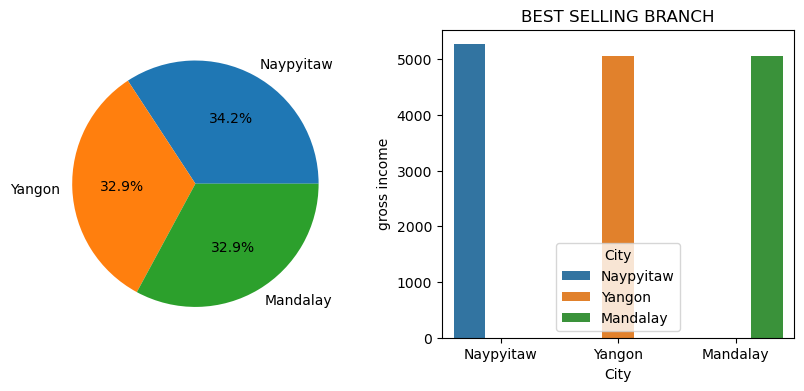

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie('gross income',labels='City',data=df2,autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.barplot(x='City',y='gross income',data=df2,hue='City').set_title('BEST SELLING BRANCH')

In [27]:
# HIGHEST RATING BRANCH
df3=df.groupby(['City'])['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)
df3

,City,Rating
1,Naypyitaw,7.072866
2,Yangon,7.027059
0,Mandalay,6.818072


Text(0.5, 1.0, 'HIGHEST RATING BRANCH')

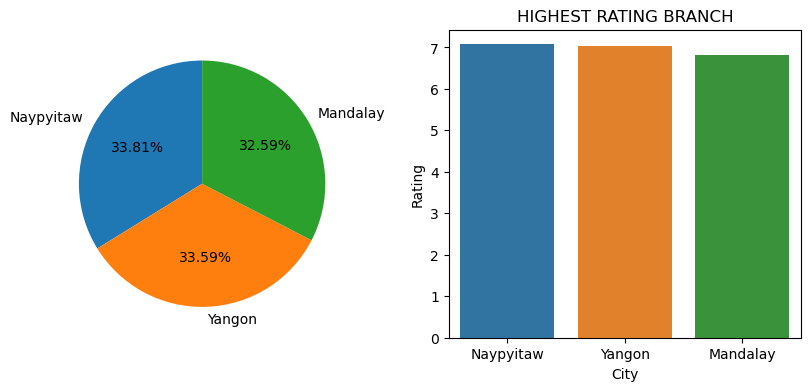

In [30]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie('Rating',labels='City',data=df3,autopct='%0.2f%%',startangle=90)
plt.subplot(1,2,2)
sns.barplot(x='City',y='Rating',errorbar=None,data=df3).set_title('HIGHEST RATING BRANCH')

In [31]:
# DAY WITH MOST INCOME

df['DayOfWeek'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [41]:
df['Weeks']=df['DayOfWeek'].apply(lambda a: 'Weekday' if a=='Monday' or a=='Tuesday' or a=='Wednesday' or a=='Thrusday' or a=='Friday' else 'Weekend')
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,...,gross margin percentage,gross income,Rating,Hour,Day,MonthNum,Year,DayOfWeek,Month,Weeks
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,...,4.761905,26.1415,9.1,13,5,1,2019,Saturday,January,Weekend
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,...,4.761905,3.8200,9.6,10,8,3,2019,Friday,March,Weekday
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,...,4.761905,16.2155,7.4,13,3,3,2019,Sunday,March,Weekend
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,...,4.761905,23.2880,8.4,20,27,1,2019,Sunday,January,Weekend
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,...,4.761905,30.2085,5.3,10,8,2,2019,Friday,February,Weekday


In [43]:
df.groupby(['Weeks'])['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False) 

,Weeks,gross income
0,Weekday,8430.419
1,Weekend,6948.950


In [38]:
df['gross income'].sum()

15379.368999999999

In [56]:
# DAY OF THE WEEK IN EACH MONTH WHICH HAS MOST INCOME

df4=df.groupby(['Month','DayOfWeek'])['gross income'].max().reset_index(1).sort_values(by='Month',ascending=False).reset_index()
df4

,Month,DayOfWeek,gross income
0,March,Wednesday,44.9190
1,March,Tuesday,44.6580
2,March,Thursday,43.8660
3,March,Sunday,40.9850
4,March,Saturday,48.6900
5,March,Monday,39.4800
6,March,Friday,45.3250
7,January,Thursday,40.6050
8,January,Wednesday,49.2600
9,January,Tuesday,48.6850


In [58]:
#INCOME MY MONTH

df5=df.groupby(['Month'])['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False)
df5

,Month,gross income
1,January,5537.708
2,March,5212.167
0,February,4629.494


<Axes: xlabel='Customer type', ylabel='count'>

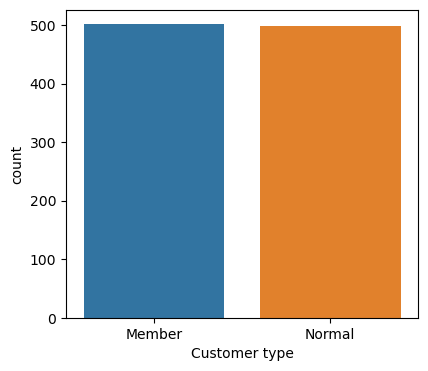

In [80]:
#CUSTOMER TYPES
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Customer type', data=df)

In [85]:
#GROSS INCOME OF EACH CUSTOMER TYPE

df.groupby(['Customer type'])['gross income'].sum().reset_index()

,Customer type,gross income
0,Member,7820.164
1,Normal,7559.205


<Axes: xlabel='Payment', ylabel='count'>

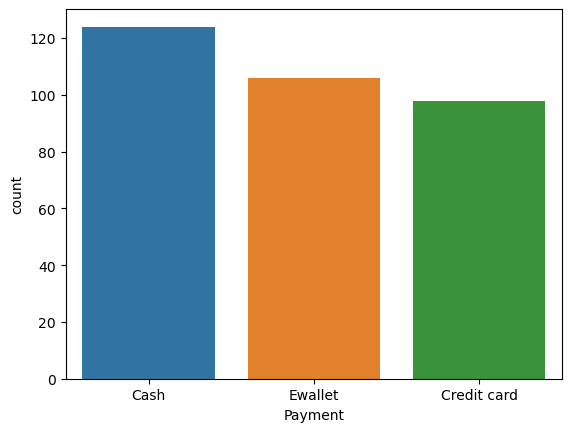

In [98]:
#FIND HIGHEST PAYMENT mode for Naypyitaw City

sns.countplot(x='Payment', data=df[df['City']=='Naypyitaw'])